<a href="https://colab.research.google.com/github/bunnynoddy14/Lead_score/blob/main/Lead_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lead Scoring Case Study

## Problem Statement
### The education company, X Education, wants to identify the most potential leads so that their Sales team can focus more on communicating with these potential leads in order to successfully convert them.

### Importing libraries

In [826]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

## Reading the Data and Understanding Data

In [827]:
df = pd.read_csv('/content/Leads.csv')

In [828]:
## Reading heads of Data
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [829]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [830]:
## checking the shape of data and info
df.shape

(9240, 37)

In [831]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [832]:
## Checking null values in data
df.isnull().sum().sort_values(ascending=False)

,0
Lead Quality,4767
Asymmetrique Activity Index,4218
Asymmetrique Profile Score,4218
Asymmetrique Activity Score,4218
Asymmetrique Profile Index,4218
Tags,3353
Lead Profile,2709
What matters most to you in choosing a course,2709
What is your current occupation,2690
Country,2461


In [833]:
# Drop all the columns in which greater than 3000 missing values are present
for col in df.columns:
    if df[col].isnull().sum() > 3000:
        df.drop(col, axis=1, inplace=True)


In [834]:
df.shape

(9240, 31)

In [835]:
## checking null value % for each columns
df.isnull().sum()/df.shape[0]*100

,0
Prospect ID,0.000000
Lead Number,0.000000
Lead Origin,0.000000
Lead Source,0.389610
Do Not Email,0.000000
Do Not Call,0.000000
Converted,0.000000
TotalVisits,1.482684
Total Time Spent on Website,0.000000
Page Views Per Visit,1.482684


In [836]:
## Most of the columns contains "Select" which is nothing but the data not provided and can be counted as Null value
## Checking those value from each columns
for col in df.columns:
    print(df[col].astype('category').value_counts())
    print("********************************")

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
********************************
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
********************************
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
********************************
Lead 

In [837]:
## Lead profile, Specialisation and How did you hear about X Education seems very less realted data hence can be dropped
df.drop(['Lead Profile','Specialization','How did you hear about X Education'],axis=1,inplace=True)

In [838]:
df.drop(['Lead Origin','Lead Source'],axis=1,inplace=True)

In [839]:
df.drop(['Last Notable Activity'],axis=1,inplace=True)

In [840]:
df.isnull().sum()/df.shape[0]*100

,0
Prospect ID,0.000000
Lead Number,0.000000
Do Not Email,0.000000
Do Not Call,0.000000
Converted,0.000000
TotalVisits,1.482684
Total Time Spent on Website,0.000000
Page Views Per Visit,1.482684
Last Activity,1.114719
Country,26.634199


In [841]:
## Checking Lead quality columns info
df.shape

(9240, 25)

### Few columns we observed that they have same values in all as No or Do Not Call. so it is better to drop them as well.

In [842]:
# Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points.Let's drop them as well.
df1 = df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content', 'Get updates on DM Content',
 'I agree to pay the amount through cheque'], axis=1, inplace=True)


In [843]:
## Checking null values in current data set again
df.isnull().sum().sort_values(ascending=False)

,0
What matters most to you in choosing a course,2709
What is your current occupation,2690
Country,2461
City,1420
TotalVisits,137
Page Views Per Visit,137
Last Activity,103
Prospect ID,0
Lead Number,0
Do Not Email,0


In [844]:
## checking th value in What matters most to you in choosing a course
df['What matters most to you in choosing a course'].value_counts()

,count
What matters most to you in choosing a course,
Better Career Prospects,6528
Flexibility & Convenience,2
Other,1


In [845]:
## Dropping What matters most to you in choosing a course	since it has mostly the same value in all the columns
df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [846]:
df.isnull().sum().sort_values(ascending=False)

,0
What is your current occupation,2690
Country,2461
City,1420
TotalVisits,137
Page Views Per Visit,137
Last Activity,103
Prospect ID,0
Lead Number,0
Do Not Email,0
Converted,0


In [847]:
## In City Null value to be replaced with "Not provided"
df['City'].fillna('Not provided', inplace=True)

In [848]:
df['Country'].fillna('Not provided', inplace=True)

In [849]:
df['What is your current occupation'].fillna('Not provided', inplace=True)

In [850]:
## renaming What is your current occupation to "Occupation"
df = df.rename(columns={'What is your current occupation':'Occupation'})

In [851]:
## Checking the value in What is your current occupation
df['Occupation'].value_counts()

,count
Occupation,
Unemployed,5600
Not provided,2690
Working Professional,706
Student,210
Other,16
Housewife,10
Businessman,8


### We will no drop this column as it may contain useful variables for coefficient and correlations but we can drop the null value present in all the available columns

In [852]:
df.shape

(9240, 12)

In [853]:
## we can drop the null value present in all the available columns
df = df[~pd.isnull(df['Occupation'])]

In [854]:
df.shape

(9240, 12)

In [855]:
## Removing same null value from the rows of "Country", "City", "TotalVisits", "Page Views Per Visit", 	"Last Activity" & "Lead Source"
df = df[~pd.isnull(df['Country'])]

#### Checking the null values for the below 4 columns

In [856]:
df.shape

(9240, 12)

In [857]:
df = df[~pd.isnull(df['TotalVisits'])]
df = df[~pd.isnull(df['Page Views Per Visit'])]
df = df[~pd.isnull(df['Last Activity'])]
# df = df[~pd.isnull(df['Lead Source'])]

In [858]:
df.shape

(9103, 12)

In [859]:
df.isnull().sum().sort_values(ascending=False)

,0
Prospect ID,0
Lead Number,0
Do Not Email,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0
Last Activity,0
Country,0
Occupation,0


In [860]:
df.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Occupation,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,No,0,0.0,0,0.0,Page Visited on Website,Not provided,Unemployed,Select,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Select,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,No,1,2.0,1532,2.0,Email Opened,India,Student,Mumbai,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Mumbai,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Mumbai,No


In [861]:
## Furthermore as columns Prospect ID	Lead Number does not provide any help in creating useful insights, better to drop them
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [862]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Occupation,City,A free copy of Mastering The Interview
0,No,0,0.0,0,0.0,Page Visited on Website,Not provided,Unemployed,Select,No
1,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Select,No
2,No,1,2.0,1532,2.0,Email Opened,India,Student,Mumbai,Yes
3,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Mumbai,No
4,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Mumbai,No


In [863]:
## checking City values
df.City.value_counts()

,count
City,
Mumbai,3179
Select,2181
Not provided,1419
Thane & Outskirts,746
Other Cities,680
Other Cities of Maharashtra,447
Other Metro Cities,377
Tier II Cities,74


In [864]:
## In City replacing "Select" as "Not Provided"
df.City.replace('Select', 'Not Provided', inplace=True)
## Combining "Other cities" and "Other cities of Maharashtra" into "Other Cities"
df.City.replace({'Other Cities of Maharashtra':'Other Cities'}, inplace=True)
df.City.replace({'Thane & Outskirts':'Thane'}, inplace=True)

In [865]:
df.City.value_counts()

,count
City,
Mumbai,3179
Not Provided,2181
Not provided,1419
Other Cities,1127
Thane,746
Other Metro Cities,377
Tier II Cities,74


In [866]:
df.City.value_counts()

,count
City,
Mumbai,3179
Not Provided,2181
Not provided,1419
Other Cities,1127
Thane,746
Other Metro Cities,377
Tier II Cities,74


In [867]:
# ##Checking value count of Last Notable Activity variable
# df['Last Notable Activity'].value_counts()

In [868]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Occupation,City,A free copy of Mastering The Interview
0,No,0,0.0,0,0.0,Page Visited on Website,Not provided,Unemployed,Not Provided,No
1,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Not Provided,No
2,No,1,2.0,1532,2.0,Email Opened,India,Student,Mumbai,Yes
3,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Mumbai,No
4,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Mumbai,No


In [869]:
## Checking value count of Country
df.Country.value_counts()

,count
Country,
India,6492
Not provided,2324
United States,69
United Arab Emirates,53
Singapore,24
Saudi Arabia,21
United Kingdom,15
Australia,13
Qatar,10


In [870]:
## Drop country as well since it has all India almost
df.drop('Country', axis=1, inplace=True)

In [871]:
df.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Occupation', 'City', 'A free copy of Mastering The Interview'],
      dtype='object')

## Creating dummy variables

In [872]:
## creating dummy variables for categorical columns
# dummy = pd.get_dummies(df[['Lead Origin', 'City', 'Lead Source', 'Last Activity',
#                               'What is your current occupation','A free copy of Mastering The Interview',
#                               'Last Notable Activity']], drop_first=True, dtype=int)
# dummy = pd.get_dummies(df[['City','Last Activity',
#                               'What is your current occupation','A free copy of Mastering The Interview',
#                               'Last Notable Activity']], drop_first=True, dtype=int)
dummy = pd.get_dummies(df[['City','Last Activity',
                              'Occupation','A free copy of Mastering The Interview']], drop_first=True, dtype=int)

In [873]:
## concating them to master file
df = pd.concat([df, dummy], axis=1)

In [874]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Occupation,City,A free copy of Mastering The Interview,City_Not Provided,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Occupation_Housewife,Occupation_Not provided,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Not Provided,No,1,...,0,0,0,0,0,0,0,1,0,0
1,No,0,5.0,674,2.5,Email Opened,Unemployed,Not Provided,No,1,...,0,0,0,0,0,0,0,1,0,0
2,No,1,2.0,1532,2.0,Email Opened,Student,Mumbai,Yes,0,...,0,0,0,0,0,0,1,0,0,1
3,No,0,1.0,305,1.0,Unreachable,Unemployed,Mumbai,No,0,...,0,0,0,0,0,0,0,1,0,0
4,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Mumbai,No,0,...,0,0,0,0,0,0,0,1,0,0


In [875]:
## Dropping all the dummy variable which is created
# df.drop(['Lead Origin', 'Lead Source', 'City', 'Last Activity',
#                               'What is your current occupation','A free copy of Mastering The Interview',
#                               'Last Notable Activity'], axis=1, inplace=True)

# df.drop(['City', 'Last Activity',
#                               'What is your current occupation','A free copy of Mastering The Interview',
#                               'Last Notable Activity'], axis=1, inplace=True)
df.drop(['City', 'Last Activity',
                              'Occupation','A free copy of Mastering The Interview'], axis=1, inplace=True)

In [876]:
## renaming column "do not email" as "Contact Via Email"
df = df.rename(columns={'Do Not Email': 'Contact Via Email'})
df.head()

,Contact Via Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Not Provided,City_Not provided,City_Other Cities,City_Other Metro Cities,City_Thane,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Occupation_Housewife,Occupation_Not provided,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,No,0,0.0,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,No,0,5.0,674,2.5,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,No,1,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,No,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,No,1,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [877]:
def binary_map(x):
  return x.map({'Yes': 0, 'No': 1})

In [878]:
df[['Contact Via Email']] = df[['Contact Via Email']].apply(binary_map)

In [879]:
df.head()

,Contact Via Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Not Provided,City_Not provided,City_Other Cities,City_Other Metro Cities,City_Thane,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Occupation_Housewife,Occupation_Not provided,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,1,0,0.0,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,5.0,674,2.5,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [880]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Contact Via Email                           9103 non-null   int64  
 1   Converted                                   9103 non-null   int64  
 2   TotalVisits                                 9103 non-null   float64
 3   Total Time Spent on Website                 9103 non-null   int64  
 4   Page Views Per Visit                        9103 non-null   float64
 5   City_Not Provided                           9103 non-null   int64  
 6   City_Not provided                           9103 non-null   int64  
 7   City_Other Cities                           9103 non-null   int64  
 8   City_Other Metro Cities                     9103 non-null   int64  
 9   City_Thane                                  9103 non-null   int64  
 10  City_Tier II Citi

In [881]:
df_temp = df[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]
df_temp.describe(percentiles=[.25, .5, .75, .90, .95, .99])


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820
std,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,919.500000,3.000000
90%,7.000000,1372.000000,5.000000
95%,10.000000,1556.900000,6.000000
99%,17.000000,1838.960000,9.000000


<Axes: ylabel='TotalVisits'>

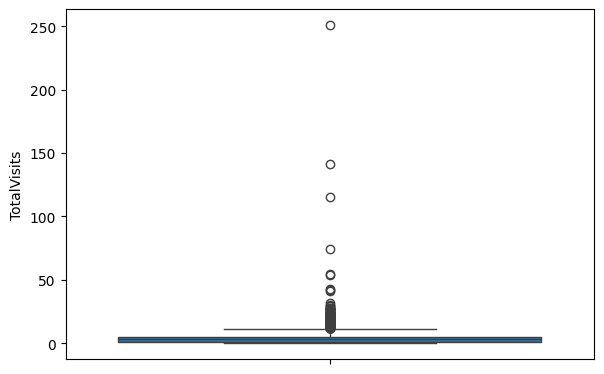

In [882]:
## checking outlier in TotalVisits columns with boxplot
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(df['TotalVisits'])

In [883]:
## Removing outlier from Totalvisits columns
Q1 = df['TotalVisits'].quantile(0.25)
Q3 = df['TotalVisits'].quantile(0.99)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['TotalVisits'] >= lower_bound) & (df['TotalVisits'] <= upper_bound)]


In [884]:
df.head()

,Contact Via Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Not Provided,City_Not provided,City_Other Cities,City_Other Metro Cities,City_Thane,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Occupation_Housewife,Occupation_Not provided,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,1,0,0.0,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,5.0,674,2.5,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [885]:
df.shape

(9095, 34)

### Taking Train Test Split

In [886]:
from sklearn.model_selection import train_test_split

In [887]:
## Dropping target variable converted column and savng intonew variable called X
X = df.drop('Converted', axis=1)

In [888]:
y = df['Converted']

In [889]:
X.head()

,Contact Via Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Not Provided,City_Not provided,City_Other Cities,City_Other Metro Cities,City_Thane,City_Tier II Cities,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Occupation_Housewife,Occupation_Not provided,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,1,0.0,0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,5.0,674,2.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,2.0,1532,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,1.0,305,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [890]:
y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


In [891]:
## Splitting into 70% train data and 30% split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [892]:
## Further scalling to the numeric numericals present in the data set
from sklearn.preprocessing import MinMaxScaler

In [893]:
## Scaling numeric variables in data set
scaler = MinMaxScaler()

In [894]:
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,Contact Via Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Not Provided,City_Not provided,City_Other Cities,City_Other Metro Cities,City_Thane,City_Tier II Cities,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Occupation_Housewife,Occupation_Not provided,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,A free copy of Mastering The Interview_Yes
2779,1,0.073171,0.010209,0.093750,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2423,1,0.073171,0.084332,0.093750,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6307,1,0.121951,0.067909,0.156250,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1422,0,0.146341,0.065690,0.187500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
308,1,0.121951,0.662672,0.104375,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [895]:
## looking at the correlation of the dataset now
df.select_dtypes(include=[float, int]).corr()


,Contact Via Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Not Provided,City_Not provided,City_Other Cities,City_Other Metro Cities,City_Thane,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Occupation_Housewife,Occupation_Not provided,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,A free copy of Mastering The Interview_Yes
Contact Via Email,1.000000,0.135576,-0.006364,0.048939,-0.021603,0.047164,0.017044,-0.006167,-0.039243,0.008536,...,-0.265488,0.007528,0.003072,0.009221,-0.050992,0.001866,-0.007202,0.022902,0.047562,-0.055975
Converted,0.135576,1.000000,0.045150,0.355556,-0.000172,0.115254,-0.240798,0.027943,0.012019,0.041625,...,-0.019995,-0.011313,-0.008217,0.040165,-0.322828,0.018382,-0.005693,0.128363,0.315095,-0.033352
TotalVisits,-0.006364,0.045150,1.000000,0.311752,0.674671,-0.244450,-0.224865,0.094609,0.065474,0.089722,...,0.006181,0.030763,0.001933,-0.008368,-0.068912,0.042783,-0.029905,0.069217,0.000301,0.270815
Total Time Spent on Website,0.048939,0.355556,0.311752,1.000000,0.332208,-0.167359,-0.210032,0.090767,0.050710,0.076677,...,-0.003047,-0.010703,-0.006623,0.006993,-0.145907,0.031541,-0.012571,0.084031,0.096723,0.179468
Page Views Per Visit,-0.021603,-0.000172,0.674671,0.332208,1.000000,-0.278930,-0.275607,0.127364,0.098013,0.091339,...,0.020749,0.020102,0.008271,-0.007860,-0.075416,0.020799,-0.032697,0.081867,-0.007205,0.283906
City_Not Provided,0.047164,0.115254,-0.244450,-0.167359,-0.278930,1.000000,-0.241483,-0.211121,-0.116795,-0.167518,...,-0.017756,0.005628,-0.005890,-0.017677,-0.363117,0.002557,0.038611,0.283346,0.080512,-0.381709
City_Not provided,0.017044,-0.240798,-0.224865,-0.210032,-0.275607,-0.241483,1.000000,-0.161618,-0.089410,-0.128240,...,-0.005632,0.000754,-0.004509,-0.013532,0.665028,-0.017475,-0.065616,-0.531320,-0.122125,-0.291754
City_Other Cities,-0.006167,0.027943,0.094609,0.090767,0.127364,-0.211121,-0.161618,1.000000,-0.078168,-0.112116,...,0.010012,0.016345,-0.003942,-0.001213,-0.047533,0.001176,-0.005881,0.037255,0.016431,0.221526
City_Other Metro Cities,-0.039243,0.012019,0.065474,0.050710,0.098013,-0.116795,-0.089410,-0.078168,1.000000,-0.062024,...,0.016702,-0.005343,-0.002181,-0.006545,-0.030403,0.005142,0.001552,0.021639,0.012287,0.173534
City_Thane,0.008536,0.041625,0.089722,0.076677,0.091339,-0.167518,-0.128240,-0.112116,-0.062024,1.000000,...,-0.009754,-0.007663,-0.003128,0.016148,-0.051963,-0.012123,-0.013218,0.052550,-0.000717,0.046850


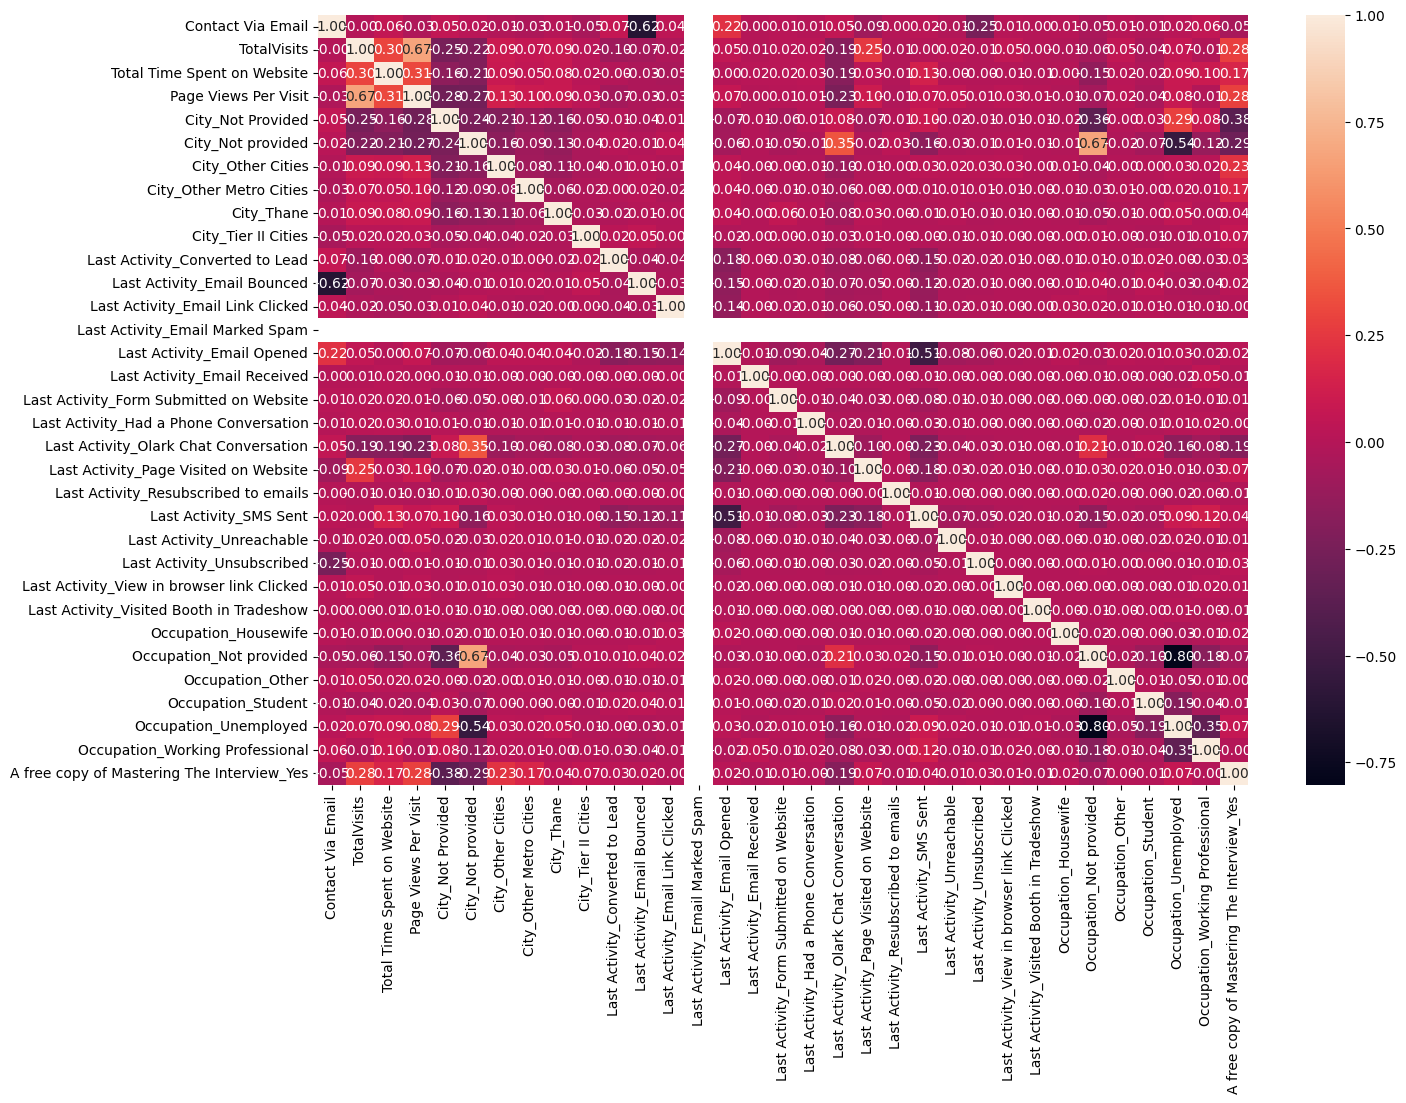

In [896]:
## visuaize X train model in heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(X_train.corr(), annot=True, fmt='.2f')
plt.show()

In [897]:
## Filtering out highly corelated
corr_matrix = X_train.corr()

In [898]:
high_corr_cols = corr_matrix[(((corr_matrix) > 0.8) & (corr_matrix != 1)) | (((corr_matrix) < -0.3) & (corr_matrix != -1))]
# high_corr_cols = corr_matrix[(((corr_matrix) < -0.1))]

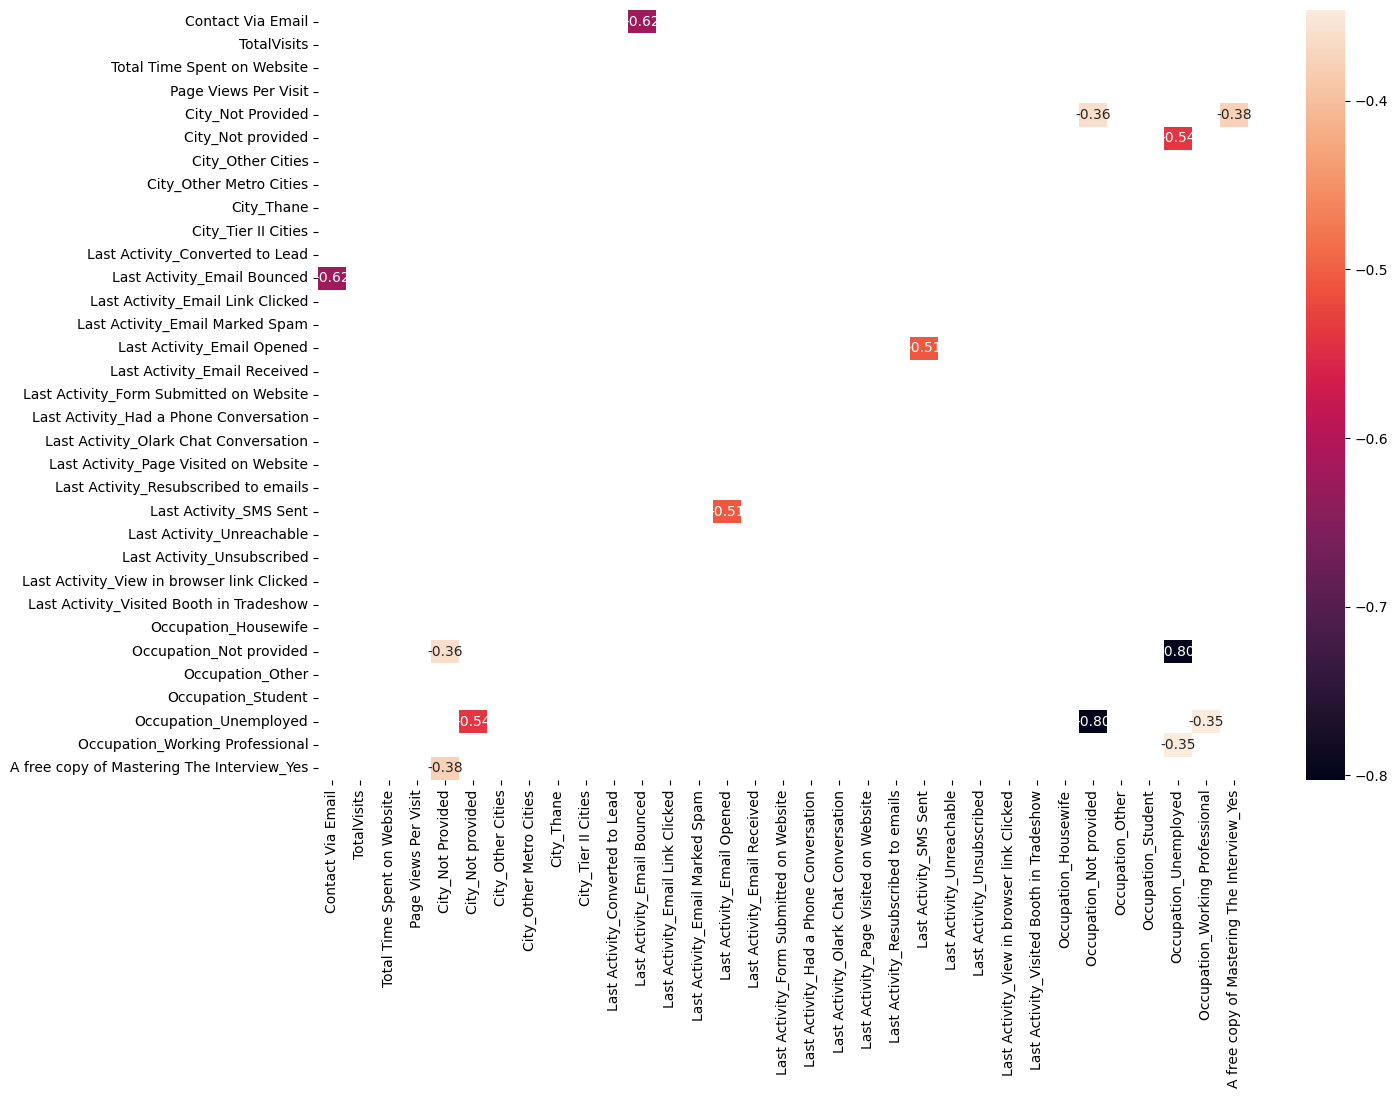

In [899]:
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_cols, annot=True, fmt='.2f')
plt.show()

In [900]:
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6366
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 17 Dec 2024   Deviance:                   1.6229e+05
Time:                        06:05:47   Pearson chi2:                 7.94e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                       3.304e+15   4.11e+07   8.05e+07      0.000     3.3e+15     3.3e+15
Contact Via Email                           2.876e+14    4.3e+06   6.68e+07      0.000    2.88e+14    2.88e+14
TotalVisits                                 4.809e+14   1.42e+07   3.38e+07      0.000    4.81e+14    4.81e+14
Total Time Spent on Website                 2.134e+15   3.84e+06   5.56e+08      0.000    2.13e+15    2.13e+15
Page Views Per Visit                       -1.395e+15   9.26e+06  -1.51e+08      0.000   -1.39e+15   -1.39e+15
City_Not Provided                           1.378e+14   2.71e+06   5.08e+07      0.000    1.38e+14    1.38e+14
City_Not provided                           6.904e+13   3.74e+06   1.84e+07      0.000     6.9e+13     6.9e+13
City_Other Cities                           2.567e+13   2.79e+06   9.21e+06      0.000    2.57e+13    2.57e+13
City_Other Metro Cities                     2.054e+13   4.43e+06   4.63e+06      0.000    2.05e+13    2.05e+13
City_Thane                                  1.589e+13   3.31e+06   4.79e+06      0.000    1.59e+13    1.59e+13
City_Tier II Cities                        -3.448e+14   9.03e+06  -3.82e+07      0.000   -3.45e+14   -3.45e+14
Last Activity_Converted to Lead            -5.074e+15   3.03e+07  -1.68e+08      0.000   -5.07e+15   -5.07e+15
Last Activity_Email Bounced                -5.127e+15   3.07e+07  -1.67e+08      0.000   -5.13e+15   -5.13e+15
Last Activity_Email Link Clicked            -5.42e+15   3.04e+07  -1.78e+08      0.000   -5.42e+15   -5.42e+15
Last Activity_Email Marked Spam               -3.4836   6.54e-08  -5.32e+07      0.000      -3.484      -3.484
Last Activity_Email Opened                 -5.526e+15   3.01e+07  -1.84e+08      0.000   -5.53e+15   -5.53e+15
Last Activity_Email Received               -2.152e+15   7.36e+07  -2.92e+07      0.000   -2.15e+15   -2.15e+15
Last Activity_Form Submitted on Website     -4.92e+15   3.09e+07  -1.59e+08      0.000   -4.92e+15   -4.92e+15
Last Activity_Had a Phone Conversation     -4.528e+15    3.4e+07  -1.33e+08      0.000   -4.53e+15   -4.53e+15
Last Activity_Olark Chat Conversation      -4.967e+15   3.02e+07  -1.65e+08      0.000   -4.97e+15   -4.97e+15
Last Activity_Page Visited on Website      -5.385e+15   3.02e+07  -1.78e+08      0.000   -5.39e+15   -5.39e+15
Last Activity_Resubscribed to emails        3.264e+14   7.36e+07   4.44e+06      0.000    3.26e+14    3.26e+14
Last Activity_SMS Sent                     -4.737e+15   3.01e+07  -1.58e+08      0.000   -4.74e+15   -4.74e+15
Last Activity_Unreachable                  -5.436e+15   3.12e+07  -1.74e+08      0.000   -5.44e+15   -5.44e+15
Last Activity_Unsubscribed                 -4.869e+15   3.23e+07  -1.51e+08      0.000

In [901]:
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [902]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Contact Via Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('City_Not Provided', False, 16),
 ('City_Not provided', False, 6),
 ('City_Other Cities', False, 18),
 ('City_Other Metro Cities', False, 11),
 ('City_Thane', False, 12),
 ('City_Tier II Cities', False, 15),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 13),
 ('Last Activity_Email Marked Spam', False, 19),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Email Received', False, 17),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_Resubscribed to emails', False, 4),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 8),
 ('Last Activity_Unsubscr

In [903]:
col = X_train.columns[rfe.support_]

In [904]:
X_train.columns[~rfe.support_]

Index(['City_Not Provided', 'City_Not provided', 'City_Other Cities',
       'City_Other Metro Cities', 'City_Thane', 'City_Tier II Cities',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow', 'Occupation_Other',
       'Occupation_Student', 'A free copy of Mastering The Interview_Yes'],
      dtype='object')

#### Assessing the model with StatsModels

In [905]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6366
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2799.5
Date:                Tue, 17 Dec 2024   Deviance:                       5599.0
Time:                        06:05:48   Pearson chi2:                 6.57e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3589
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.5011      0.262     -5.739      0.000      -2.014      -0.988
Contact Via Email                           1.1245      0.176      6.381      0.000       0.779       1.470
TotalVisits                                 1.2798      0.541      2.365      0.018       0.219       2.341
Total Time Spent on Website                 3.6843      0.153     24.081      0.000       3.384       3.984
Page Views Per Visit                       -4.5297      0.378    -11.978      0.000      -5.271      -3.789
Last Activity_Converted to Lead            -2.0325      0.215     -9.438      0.000      -2.455      -1.610
Last Activity_Email Bounced                -1.6644      0.392     -4.245      0.000      -2.433      -0.896
Last Activity_Form Submitted on Website    -1.0911      0.316     -3.448      0.001      -1.711      -0.471
Last Activity_Had a Phone Conversation      1.3795      0.625      2.206      0.027       0.154       2.605
Last Activity_Olark Chat Conversation      -1.4301      0.158     -9.048      0.000      -1.740      -1.120
Last Activity_Page Visited on Website      -0.7906      0.151     -5.252      0.000      -1.086      -0.496
Last Activity_SMS Sent                      1.1832      0.074     15.896      0.000       1.037       1.329
Occupation_Housewife                       21.6373   1.24e+04      0.002      0.999   -2.43e+04    2.43e+04
Occupation_Not provided                    -1.7137      0.203     -8.442      0.000      -2.112      -1.316
Occupation_Unemployed                      -0.2915      0.191     -1.523      0.128      -0.667       0.084
Occupation_Working Professional             2.3249      0.261      8.918      0.000       1.814       2.836
===========================================================================================================
"""

#### Getting the predicted values on the train set

In [906]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
2779,0.021588
2423,0.108074
6307,0.146767
1422,0.263202
308,0.508632
7229,0.816993
8739,0.309965
1563,0.626011
8348,0.897277
7058,0.031276


### Getting the predicted values on the train set

In [907]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
2779,0.021588
2423,0.108074
6307,0.146767
1422,0.263202
308,0.508632
7229,0.816993
8739,0.309965
1563,0.626011
8348,0.897277
7058,0.031276


In [908]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.021588  , 0.1080735 , 0.14676683, 0.26320155, 0.50863203,
       0.81699328, 0.30996528, 0.62601097, 0.89727673, 0.03127566])

In [909]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.021588,2779
1,0,0.108074,2423
2,0,0.146767,6307
3,0,0.263202,1422
4,0,0.508632,308


In [910]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted.map(lambda x: 1 if x > 0.5 else 0)

#### Let's see the head

In [911]:
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,0,0.021588,2779,0
1,0,0.108074,2423,0
2,0,0.146767,6307,0
3,0,0.263202,1422,0
4,0,0.508632,308,0


In [912]:
from sklearn import metrics
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3973    0]
 [   0 2393]]


### Let's check the overall accuracy.

In [913]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

1.0


### Checking VIFs
#### Check for the VIF values of the feature variables.

In [914]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Create a dataframe that will contain the names of all the feature variables and their respective VIFs

In [915]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Contact Via Email,13.54
13,Occupation_Unemployed,10.36
12,Occupation_Not provided,5.40
3,Page Views Per Visit,4.35
1,TotalVisits,3.89
14,Occupation_Working Professional,2.20
2,Total Time Spent on Website,2.11
10,Last Activity_SMS Sent,1.73
5,Last Activity_Email Bounced,1.46
8,Last Activity_Olark Chat Conversation,1.35


In [916]:
col = col.drop('Contact Via Email', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Occupation_Housewife', 'Occupation_Not provided',
       'Occupation_Unemployed', 'Occupation_Working Professional'],
      dtype='object')

In [917]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6366
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2822.2
Date:                Tue, 17 Dec 2024   Deviance:                       5644.4
Time:                        06:05:49   Pearson chi2:                 6.62e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3543
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.3783      0.193     -1.963      0.050      -0.756      -0.001
TotalVisits                                 1.2869      0.529      2.431      0.015       0.249       2.325
Total Time Spent on Website                 3.7266      0.152     24.471      0.000       3.428       4.025
Page Views Per Visit                       -4.5798      0.374    -12.242      0.000      -5.313      -3.847
Last Activity_Converted to Lead            -2.0258      0.216     -9.393      0.000      -2.448      -1.603
Last Activity_Email Bounced                -2.7047      0.353     -7.667      0.000      -3.396      -2.013
Last Activity_Form Submitted on Website    -1.1159      0.315     -3.540      0.000      -1.734      -0.498
Last Activity_Had a Phone Conversation      1.2960      0.616      2.104      0.035       0.089       2.503
Last Activity_Olark Chat Conversation      -1.4383      0.158     -9.108      0.000      -1.748      -1.129
Last Activity_Page Visited on Website      -0.8980      0.149     -6.033      0.000      -1.190      -0.606
Last Activity_SMS Sent                      1.1138      0.073     15.215      0.000       0.970       1.257
Occupation_Housewife                       21.6363   1.24e+04      0.002      0.999   -2.42e+04    2.43e+04
Occupation_Not provided                    -1.7309      0.202     -8.550      0.000      -2.128      -1.334
Occupation_Unemployed                      -0.3118      0.191     -1.633      0.102      -0.686       0.062
Occupation_Working Professional             2.3264      0.260      8.940      0.000       1.816       2.836
===========================================================================================================
"""

In [918]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
2779,0.020944
2423,0.106199
6307,0.130819
1422,0.499515
308,0.509802
7229,0.804648
8739,0.304792
1563,0.604356
8348,0.897463
7058,0.079505


In [919]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
2779,0.020944
2423,0.106199
6307,0.130819
1422,0.499515
308,0.509802
7229,0.804648
8739,0.304792
1563,0.604356
8348,0.897463
7058,0.079505


In [920]:
# y_train_pred = y_train_pred.values.reshape(-1)
# y_train_pred[:10]

In [921]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
2779,0,0.020944,2779
2423,0,0.106199,2423
6307,0,0.130819,6307
1422,0,0.499515,1422
308,0,0.509802,308


In [922]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted.map(lambda x: 1 if x > 0.5 else 0)

In [923]:
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
2779,0,0.020944,2779,0
2423,0,0.106199,2423,0
6307,0,0.130819,6307,0
1422,0,0.499515,1422,0
308,0,0.509802,308,0


In [924]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3973    0]
 [   0 2393]]


In [925]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

1.0


In [926]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,4.35
0,TotalVisits,3.89
12,Occupation_Unemployed,2.97
1,Total Time Spent on Website,2.08
11,Occupation_Not provided,1.91
9,Last Activity_SMS Sent,1.73
7,Last Activity_Olark Chat Conversation,1.34
13,Occupation_Working Professional,1.27
8,Last Activity_Page Visited on Website,1.23
3,Last Activity_Converted to Lead,1.12


In [927]:
col = col.drop('Occupation_Housewife', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Occupation_Not provided', 'Occupation_Unemployed',
       'Occupation_Working Professional'],
      dtype='object')

In [928]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6366
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2825.8
Date:                Tue, 17 Dec 2024   Deviance:                       5651.5
Time:                        06:07:32   Pearson chi2:                 6.62e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3536
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.2923      0.188     -1.553      0.120      -0.661       0.077
TotalVisits                                 1.2806      0.529      2.419      0.016       0.243       2.318
Total Time Spent on Website                 3.7260      0.152     24.474      0.000       3.428       4.024
Page Views Per Visit                       -4.5856      0.374    -12.258      0.000      -5.319      -3.852
Last Activity_Converted to Lead            -2.0328      0.216     -9.429      0.000      -2.455      -1.610
Last Activity_Email Bounced                -2.7164      0.353     -7.699      0.000      -3.408      -2.025
Last Activity_Form Submitted on Website    -1.1197      0.315     -3.552      0.000      -1.738      -0.502
Last Activity_Had a Phone Conversation      1.2945      0.616      2.102      0.036       0.087       2.502
Last Activity_Olark Chat Conversation      -1.4468      0.158     -9.161      0.000      -1.756      -1.137
Last Activity_Page Visited on Website      -0.9033      0.149     -6.069      0.000      -1.195      -0.612
Last Activity_SMS Sent                      1.1106      0.073     15.175      0.000       0.967       1.254
Occupation_Not provided                    -1.8131      0.198     -9.136      0.000      -2.202      -1.424
Occupation_Unemployed                      -0.3941      0.187     -2.111      0.035      -0.760      -0.028
Occupation_Working Professional             2.2445      0.257      8.730      0.000       1.741       2.748
===========================================================================================================
"""

In [929]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
2779,0.020828
2423,0.106459
6307,0.130438
1422,0.499140
308,0.510296
7229,0.804353
8739,0.305122
1563,0.604485
8348,0.897686
7058,0.079139


In [930]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
2779,0,0.020828,2779
2423,0,0.106459,2423
6307,0,0.130438,6307
1422,0,0.499140,1422
308,0,0.510296,308


In [931]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted.map(lambda x: 1 if x > 0.5 else 0)

In [932]:
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
2779,0,0.020828,2779,0
2423,0,0.106459,2423,0
6307,0,0.130438,6307,0
1422,0,0.499140,1422,0
308,0,0.510296,308,0


In [933]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3973    0]
 [   0 2393]]


In [934]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

1.0


In [935]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Pos''itive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

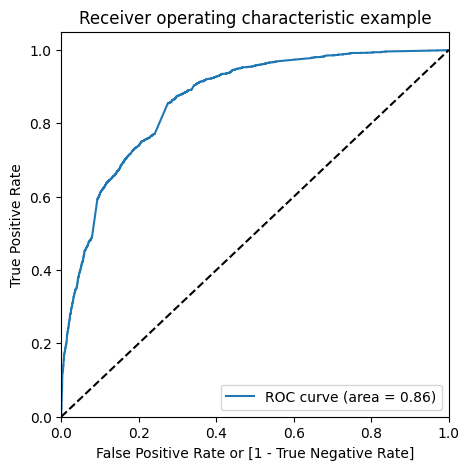

In [936]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)